In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import pickle

In [51]:
filename = 'data_evaluacion.csv'
#filename='data.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [52]:
#Dar nombres a las columnas
nombre_columna = ['edad', 'empleador_tipo', 'peso', 'educacion', 'numero_educacion', 'estado_civil', 
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia', 'perdida', 
                'horas_semana', 'pais_natal', 'ingresos']

df.columns=nombre_columna


In [53]:
#reemplazamos los registos ? con valores nulos
df[df == '?'] = np.nan
df.info()
# Rellenar valores nulos
for col in ['empleador_tipo', 'ocupacion', 'pais_natal']:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_value) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              48841 non-null  int64 
 1   empleador_tipo    46042 non-null  object
 2   peso              48841 non-null  int64 
 3   educacion         48841 non-null  object
 4   numero_educacion  48841 non-null  int64 
 5   estado_civil      48841 non-null  object
 6   ocupacion         46032 non-null  object
 7   relacion          48841 non-null  object
 8   raza              48841 non-null  object
 9   sexo              48841 non-null  object
 10  ganancia          48841 non-null  int64 
 11  perdida           48841 non-null  int64 
 12  horas_semana      48841 non-null  int64 
 13  pais_natal        47984 non-null  object
 14  ingresos          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Datos nulos después de rellenar:
edad                0
empl

In [54]:
#Dividir las variables x y y
x = df.drop(columns='ingresos', axis=1)
y = df['ingresos']


In [55]:
# Definir características numéricas y categóricas
numeric_features = ['edad', 'peso', 'numero_educacion', 'ganancia', 'perdida', 'horas_semana']
categorical_features = ['empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion',
                        'raza', 'sexo', 'pais_natal']

# Crear el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [56]:
x

,edad,empleador_tipo,peso,educacion,numero_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia,perdida,horas_semana,pais_natal
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48837,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1,  stratify=y)

In [58]:
# Crear el pipeline
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf'))])


In [59]:
pipeline2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['edad', 'peso',
                                                   'numero_educacion',
                                                   'ganancia', 'perdida',
                                                   'horas_semana']),
                                                 ('cat', OneHotEncoder(),
                                                  ['empleador_tipo',
                                                   'educacion', 'estado_civil',
                                                   'ocupacion', 'relacion',
                                                   'raza', 'sexo',
                                                   'pais_natal'])])),
                ('classifier', SVC())])

In [60]:
# Realizar predicciones
y_pred2 = pipeline2.predict(x_test)

In [61]:
x_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14653 entries, 40658 to 5719
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              14653 non-null  int64 
 1   empleador_tipo    14653 non-null  object
 2   peso              14653 non-null  int64 
 3   educacion         14653 non-null  object
 4   numero_educacion  14653 non-null  int64 
 5   estado_civil      14653 non-null  object
 6   ocupacion         14653 non-null  object
 7   relacion          14653 non-null  object
 8   raza              14653 non-null  object
 9   sexo              14653 non-null  object
 10  ganancia          14653 non-null  int64 
 11  perdida           14653 non-null  int64 
 12  horas_semana      14653 non-null  int64 
 13  pais_natal        14653 non-null  object
dtypes: int64(6), object(8)
memory usage: 1.7+ MB


In [62]:
# Evaluar el modelo
print(classification_report(y_test, y_pred2))
print(f"Accuracy: {accuracy_score(y_test, y_pred2)}")

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91     11147
        >50K       0.78      0.60      0.68      3506

    accuracy                           0.86     14653
   macro avg       0.83      0.77      0.79     14653
weighted avg       0.86      0.86      0.86     14653

Accuracy: 0.8628949703132465


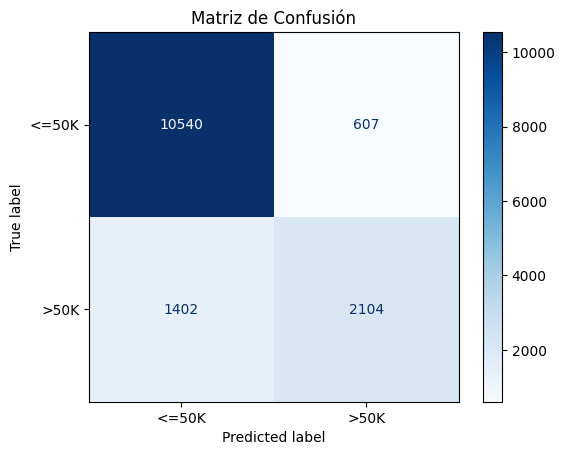

In [63]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=pipeline2.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

In [64]:
column_names = [ 'edad',  'empleador_tipo', 'peso',   'educacion',   'numero_educacion', 'estado_civil', 'ocupacion', 'relacion',  'raza',   'sexo',  'ganancia',  'perdida',   'horas_semana',  'pais_natal'  ]

# Datos de entrada
data = [22, 'Private', 125542, '11th', 7, 'Never-married', 'Farming-fishing', 'Not-in-family', 'White', 'Male', 0, 0, 40, 'United-States']

# Crear el DataFrame para la predicción
x_n_df = pd.DataFrame([data], columns=column_names)

# Realizar la predicción
predict = pipeline2.predict(x_n_df)
predict[0]

'<=50K'

In [65]:
#Grabar el modelo
pkl_archivo = "pkl_archivo.pkl"

# Guardar el modelo en el archivo
with open(pkl_archivo, 'wb') as file:
    pickle.dump(pipeline2, file)

In [66]:
#Cargamos al modelo
pkl_archivo = "pkl_archivo.pkl"
with open(pkl_archivo, 'rb') as file:
    loaded_pipeline = pickle.load(file)

print(loaded_pipeline)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['edad', 'peso',
                                                   'numero_educacion',
                                                   'ganancia', 'perdida',
                                                   'horas_semana']),
                                                 ('cat', OneHotEncoder(),
                                                  ['empleador_tipo',
                                                   'educacion', 'estado_civil',
                                                   'ocupacion', 'relacion',
                                                   'raza', 'sexo',
                                                   'pais_natal'])])),
                ('classifier', SVC())])
